In [187]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re

import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np

from datetime import date, timedelta
import plotly.offline as ply
import plotly.graph_objs as go
from plotly.tools import make_subplots
import plotly.express as px

ply.init_notebook_mode(connected=True)

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


import plotly.graph_objects as go
%matplotlib inline

In [188]:
#Загружаем данные
data = pd.read_csv("airbnb_prep.csv", header = 0, sep=';')

In [189]:
data.head()

,price,host_since,neighbourhood_cleansed,city,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,number_of_reviews,instant_bookable,calculated_host_listings_count,apartment,house,private_room,shared_room,strict_cancel,flexible_cancel,moderate_cancel
0,195.0,2632.0,1,1,4.0,1.0,1.0,1.0,1,0,...,2.0,1,21.770801,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,150.0,3201.0,1,1,2.0,1.5,1.0,1.0,1,14,...,2.0,1,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,140.0,4015.0,1,1,6.0,1.0,2.0,3.0,1,9,...,53.0,1,3.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,110.0,2745.0,1,1,3.0,1.0,0.0,2.0,1,12,...,32.0,1,4.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,119.0,3033.0,1,1,2.0,1.0,1.0,1.0,0,11,...,3.0,1,3.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [190]:
df = data.copy()

In [191]:
df.columns

Index(['price', 'host_since', 'neighbourhood_cleansed', 'city', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count', 'apartment', 'house', 'private_room',
       'shared_room', 'strict_cancel', 'flexible_cancel', 'moderate_cancel'],
      dtype='object')

In [232]:
#Загружается сравнительная таблице по ранее построенным моделям
summary = pd.read_csv('summary.csv')
summary = summary [[ 'model', 'R2_train', 'R2_test', 'MSE_train', 'MSE_test']]

In [193]:
summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33
5,simple_tree,0.262,0.327,9704.89,6634.90
6,regression_tree,0.548,0.419,4601.32,5731.36
7,random_forest,0.914,0.527,872.21,4662.02


In [194]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler
scalerX=StandardScaler().fit(X_train)
scalerY=StandardScaler().fit(y_train.reshape(-1, 1))
X_train=scalerX.transform(X_train)
y_train=scalerY.transform(y_train.reshape(-1, 1))
X_test=scalerX.transform(X_test)
y_test=scalerY.transform(y_test.reshape(-1, 1))

In [195]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [196]:
# Initialising the ANN 
# Строим сеть с архитектурой 23-23-1
rnn1 = Sequential()

# Adding the input layer and the first hidden layer
rnn1.add(Dense(output_dim = 23, activation = 'tanh', input_dim = 23))

# Adding the output layer
rnn1.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=23, units=23)`



In [197]:
rnn1.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/100
2410/2410 [==============================] - 0s 164us/step - loss: 0.6772 - accuracy: 0.0000e+00
Epoch 2/100
2410/2410 [==============================] - 0s 83us/step - loss: 0.5075 - accuracy: 0.0000e+00
Epoch 3/100
2410/2410 [==============================] - 0s 85us/step - loss: 0.4857 - accuracy: 0.0000e+00
Epoch 4/100
2410/2410 [==============================] - 0s 85us/step - loss: 0.4766 - accuracy: 0.0000e+00
Epoch 5/100
2410/2410 [==============================] - 0s 86us/step - loss: 0.4685 - accuracy: 0.0000e+00
Epoch 6/100
2410/2410 [==============================] - 0s 83us/step - loss: 0.4600 - accuracy: 0.0000e+00
Epoch 7/100
2410/2410 [==============================] - 0s 85us/step - loss: 0.4498 - accuracy: 0.0000e+00
Epoch 8/100
2410/2410 [==============================] - 0s 83us/step - loss: 0.4426 - accuracy: 0.0000e+00
Epoch 9/100
2410/2410 [==============================] - 0s 88us/step - loss: 0.4331 - accuracy: 0.0000e+00
Epoch 10/100
2410/2410 [===

In [198]:
# Predict the Training set results
y_modeled1=rnn1.predict(X_train)

In [199]:
# Predicting the Test set results
y_pred1=rnn1.predict(X_test)

In [200]:
# Initialising the ANN 
# Строим сеть с архитектурой 23-12-6-1

rnn2 = Sequential()

# Adding the input layer and the first hidden layer
rnn2.add(Dense(output_dim = 12, activation = 'tanh', input_dim = 23))

# Adding the hidden layer
rnn2.add(Dense(6, activation='tanh'))

# Adding the output layer
rnn2.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn2.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=23, units=12)`



In [201]:
# Fitting the ANN to the Training set
rnn2.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/100
2410/2410 [==============================] - 0s 196us/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 2/100
2410/2410 [==============================] - 0s 92us/step - loss: 0.5952 - accuracy: 0.0000e+00
Epoch 3/100
2410/2410 [==============================] - 0s 91us/step - loss: 0.5460 - accuracy: 0.0000e+00
Epoch 4/100
2410/2410 [==============================] - 0s 91us/step - loss: 0.5182 - accuracy: 0.0000e+00
Epoch 5/100
2410/2410 [==============================] - 0s 90us/step - loss: 0.4999 - accuracy: 0.0000e+00
Epoch 6/100
2410/2410 [==============================] - 0s 89us/step - loss: 0.4863 - accuracy: 0.0000e+00
Epoch 7/100
2410/2410 [==============================] - 0s 90us/step - loss: 0.4735 - accuracy: 0.0000e+00
Epoch 8/100
2410/2410 [==============================] - 0s 91us/step - loss: 0.4647 - accuracy: 0.0000e+00
Epoch 9/100
2410/2410 [==============================] - 0s 92us/step - loss: 0.4570 - accuracy: 0.0000e+00
Epoch 10/100
2410/2410 [===

In [202]:
# Predict the Training set results
y_modeled2=rnn2.predict(X_train)

In [203]:
# Predicting the Test set results
y_pred2 = rnn2.predict(X_test)

In [204]:
# Initialising the ANN 
# Строим сеть с архитектурой 23-5-1

rnn3 = Sequential()

# Adding the input layer and the first hidden layer
rnn3.add(Dense(output_dim = 5, activation = 'tanh', input_dim = 23))

# Adding the output layer
rnn3.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn3.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=23, units=5)`



In [205]:
# Fitting the ANN to the Training set
rnn3.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\RIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/100
2410/2410 [==============================] - 0s 165us/step - loss: 0.9158 - accuracy: 0.0000e+00
Epoch 2/100
2410/2410 [==============================] - 0s 82us/step - loss: 0.6212 - accuracy: 0.0000e+00
Epoch 3/100
2410/2410 [==============================] - 0s 83us/step - loss: 0.5702 - accuracy: 0.0000e+00
Epoch 4/100
2410/2410 [==============================] - 0s 82us/step - loss: 0.5453 - accuracy: 0.0000e+00
Epoch 5/100
2410/2410 [==============================] - 0s 82us/step - loss: 0.5286 - accuracy: 0.0000e+00
Epoch 6/100
2410/2410 [==============================] - 0s 83us/step - loss: 0.5172 - accuracy: 0.0000e+00
Epoch 7/100
2410/2410 [==============================] - 0s 83us/step - loss: 0.5070 - accuracy: 0.0000e+00
Epoch 8/100
2410/2410 [==============================] - 0s 85us/step - loss: 0.4994 - accuracy: 0.0000e+00
Epoch 9/100
2410/2410 [==============================] - 0s 85us/step - loss: 0.4932 - accuracy: 0.0000e+00
Epoch 10/100
2410/2410 [===

In [206]:
# Predict the Training set results
y_modeled3=rnn3.predict(X_train)

In [207]:
# Predicting the Test set results
y_pred3 = rnn3.predict(X_test)

In [208]:
# Inverting scaling
# Применяем обратное шкалирование

from sklearn.preprocessing import StandardScaler
X_train=scalerX.inverse_transform(X_train)
y_train=scalerY.inverse_transform(y_train.reshape(-1, 1))

y_modeled1=scalerY.inverse_transform(y_modeled1)
y_modeled2=scalerY.inverse_transform(y_modeled2)
y_modeled3=scalerY.inverse_transform(y_modeled3)


X_test=scalerX.inverse_transform(X_test)
y_test=scalerY.inverse_transform(y_test)

y_pred1=scalerY.inverse_transform(y_pred1)
y_pred2=scalerY.inverse_transform(y_pred2)
y_pred3=scalerY.inverse_transform(y_pred3)

In [209]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
# Вычесляем показатель качества моделей MSE

model_summary1 = {'model':'rnn23-23-1', 'MSE_train':round(mean_squared_error(y_modeled1, y_train),2)
                  ,'MSE_test':round(mean_squared_error(y_pred1, y_test),2)}

model_summary2 = {'model':'rnn23-12-6-1', 'MSE_train':round(mean_squared_error(y_modeled2, y_train),2)
                  ,'MSE_test':round(mean_squared_error(y_pred2, y_test),2)}

model_summary3 = {'model':'rnn23-5-1', 'MSE_train':round(mean_squared_error(y_modeled3, y_train),2)
                  ,'MSE_test':round(mean_squared_error(y_pred3, y_test),2)}


In [233]:
summary = summary.append(model_summary1, ignore_index=True)
summary = summary.append(model_summary2, ignore_index=True)
summary = summary.append(model_summary3, ignore_index=True)

summary

,model,R2_train,R2_test,MSE_train,MSE_test
0,simle_linear_accomodates,0.255,0.247,7592.33,7423.67
1,simple_linear_bedrooms,0.259,0.325,7545.87,6651.37
2,multiple_linear_all,0.513,0.260,4958.94,7292.65
3,multiple_linear2,0.513,0.488,4967.65,5046.47
4,polynomial_regression,0.260,0.325,7545.85,6652.33
5,simple_tree,0.262,0.327,9704.89,6634.90
6,regression_tree,0.548,0.419,4601.32,5731.36
7,random_forest,0.914,0.527,872.21,4662.02
8,rnn23-23-1,NaN,NaN,2554.17,7011.03
9,rnn23-12-6-1,NaN,NaN,2769.17,7434.60


Как видно из сводной таблицы, нейронные сети показали не наилучший результат из всех моделей. Лучшей оказалась сеть с архитектурой 23-5-1. Как и во всех моделях, ошибки на тестовых выборках значительно выше. 

Также были построены, но не включены в отчет сети с другими архитектурами, сети с использованием только значимых переменных, однако их ошибки были значительно выше. 

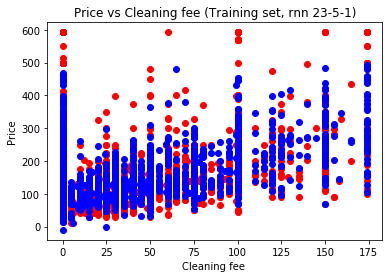

In [216]:
# Visualising the Training set results
plt.scatter(X_train[:, 9], y_train, color='red')
plt.plot(X_train[:, 9], y_modeled3, 'bo')
plt.title('Price vs Cleaning fee (Training set, rnn 23-5-1)')
plt.xlabel('Cleaning fee ')
plt.ylabel('Price')
plt.show()

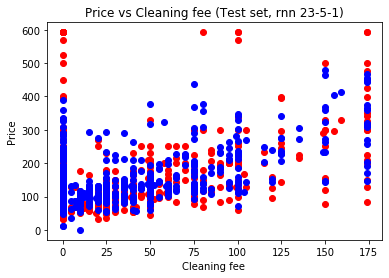

In [218]:
# Visualising the Training set results
plt.scatter(X_test[:, 9], y_test, color='red')
plt.plot(X_test[:, 9], y_pred3, 'bo')
plt.title('Price vs Cleaning fee (Test set, rnn 23-5-1)')
plt.xlabel('Cleaning fee ')
plt.ylabel('Price')
plt.show()

Визуализация результатов показывуает, что модели достаточно хорошо справляюстся с задачей, однако некоторые модельные точки далеки от реальных. 

In [234]:
summary.to_csv('summary.csv')